In [3]:
import pandas as pd

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from acquire_timeseries import acquire_timeseries

In [4]:
ds_group_ts = acquire_timeseries(
    input_csv='group_samples/group_popularity_until_13.02.2023.csv',
    input_format='DAOD',  # AOD
    input_subformat='HIGG',  # TOPQ HIGG SUSY PHYS
    input_project='mc16_13TeV'  # data16_13TeV
)
ds_group_ts

2018-01-01     294
2018-01-08    1208
2018-01-15    2372
2018-01-22    1245
2018-01-29     818
              ... 
2023-01-16    1687
2023-01-23    1323
2023-01-30    1735
2023-02-06     805
2023-02-13     218
Length: 268, dtype: int64

<AxesSubplot: >

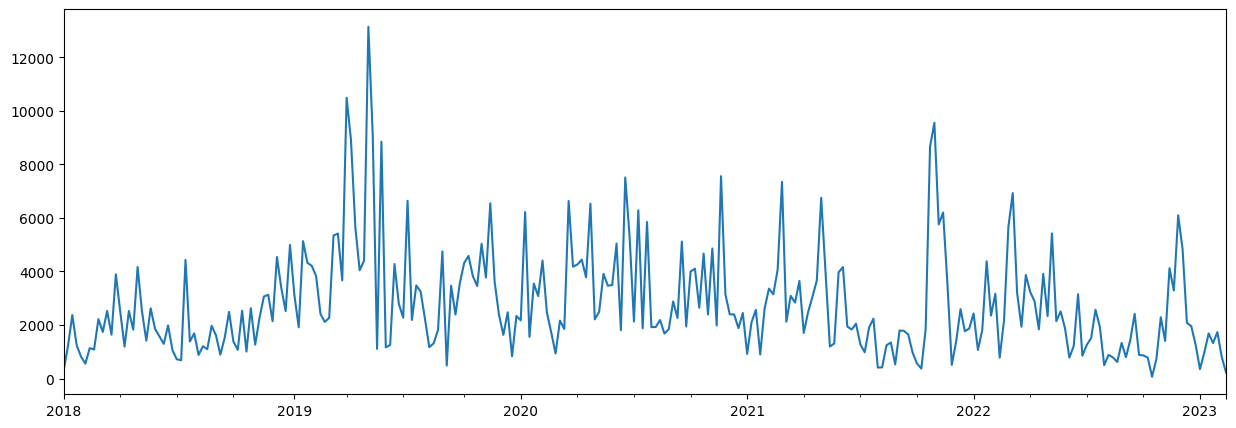

In [5]:
ds_group_ts.plot(figsize=(15, 5))

In [6]:
df = pd.DataFrame({'ds' : ds_group_ts.index, 'y' : ds_group_ts})
df

,ds,y
2018-01-01,2018-01-01,294
2018-01-08,2018-01-08,1208
2018-01-15,2018-01-15,2372
2018-01-22,2018-01-22,1245
2018-01-29,2018-01-29,818
...,...,...
2023-01-16,2023-01-16,1687
2023-01-23,2023-01-23,1323
2023-01-30,2023-01-30,1735
2023-02-06,2023-02-06,805


In [7]:
m = Prophet(yearly_seasonality=True,
            changepoint_prior_scale=0.05)
m.fit(df)

18:49:32 - cmdstanpy - INFO - Chain [1] start processing
18:49:32 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
df_cv = cross_validation(m, initial='730 days', period='180 days',
                             horizon='365 days')
df_cv

  0%|          | 0/5 [00:00<?, ?it/s]

18:49:32 - cmdstanpy - INFO - Chain [1] start processing
18:49:32 - cmdstanpy - INFO - Chain [1] done processing
18:49:32 - cmdstanpy - INFO - Chain [1] start processing
18:49:32 - cmdstanpy - INFO - Chain [1] done processing
18:49:32 - cmdstanpy - INFO - Chain [1] start processing
18:49:32 - cmdstanpy - INFO - Chain [1] done processing
18:49:33 - cmdstanpy - INFO - Chain [1] start processing
18:49:33 - cmdstanpy - INFO - Chain [1] done processing
18:49:33 - cmdstanpy - INFO - Chain [1] start processing
18:49:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-02,3971.212703,1770.975064,6105.042190,937,2020-02-24
1,2020-03-09,4663.128762,2639.586462,6779.257119,2164,2020-02-24
2,2020-03-16,5917.793041,3779.212145,8061.296550,1851,2020-02-24
3,2020-03-23,7175.894291,4951.545182,9192.950889,6633,2020-02-24
4,2020-03-30,7632.720071,5597.984773,9721.008943,4179,2020-02-24
...,...,...,...,...,...,...
256,2023-01-16,2460.415195,307.305289,4595.802945,1687,2022-02-13
257,2023-01-23,2489.661605,307.504898,4823.842020,1323,2022-02-13
258,2023-01-30,2484.972010,312.678589,4633.016672,1735,2022-02-13
259,2023-02-06,2582.052821,516.481006,4646.463689,805,2022-02-13


In [10]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,4.822289e+06,2195.971035,1684.094775,0.778191,0.488653,0.512573,0.692308
1,37 days,4.771807e+06,2184.446711,1670.956185,0.709766,0.488653,0.492396,0.692308
2,39 days,4.925847e+06,2219.424943,1713.157302,0.705565,0.488653,0.490100,0.653846
3,41 days,4.944657e+06,2223.658563,1720.308751,0.750005,0.604226,0.508896,0.653846
4,42 days,5.244406e+06,2290.066729,1825.430470,0.773509,0.643060,0.526221,0.615385
...,...,...,...,...,...,...,...,...
231,359 days,4.658676e+06,2158.396546,1779.807951,1.631607,0.952446,0.699680,0.615385
232,361 days,4.354476e+06,2086.738179,1733.703276,1.611714,0.952446,0.697239,0.615385
233,363 days,4.149548e+06,2037.043965,1658.398465,1.546073,0.897773,0.681466,0.653846
234,364 days,4.185329e+06,2045.807786,1678.238121,1.540637,0.897773,0.677546,0.653846


In [9]:
df_p = performance_metrics(df_cv, rolling_window=1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,4.760662e+06,2181.894133,1752.586728,1.285454,0.638924,0.589447,0.659004
